# Risk Assesment Report

## Executive Summary




## Overall Trading Partner Risk

Overall CBP reported seizures by country. This is not the predicted risk for our product list but rather historical CBP reported data.

In [69]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

ipr_df = pd.read_csv("data/raw/ipr-seizures-fy19-fy23_0.csv")
ipr_df.head()

,FY,Trading Partner,Mode of Transportation,Centers of Excellence,Product,Unique Seizure ID,Line,MSRP
0,2022,CN,Other,Consumer Products & Mass Merchandising,Other,202201000001,1,49314.32
1,2022,CN,Other,"Apparel, Footwear & Textiles",Wearing Apparel/Accessories,202201000002,1,45391.07
2,2022,CN,Other,"Apparel, Footwear & Textiles",Wearing Apparel/Accessories,202201000002,2,9753.60
3,2022,HK,Express Consignment,Consumer Products & Mass Merchandising,Handbags/Wallets,202201000003,1,30800.00
4,2022,HK,Express Consignment,Consumer Products & Mass Merchandising,Handbags/Wallets,202201000004,1,2840.00


In [92]:
tp_df = (
    ipr_df[ipr_df.Product == "Wearing Apparel/Accessories"]
    .groupby("Trading Partner", as_index=False)
    .size()
    .sort_values(ascending=True, by="size")
)
tp_df.rename(columns={"size": "Seizures"}, inplace=True)
tp_df

,Trading Partner,Seizures
0,CA,460
4,SG,1238
2,HK,21053
5,TR,21280
1,CN,33333
3,Other Countries,52026


Total Seizures: 129390


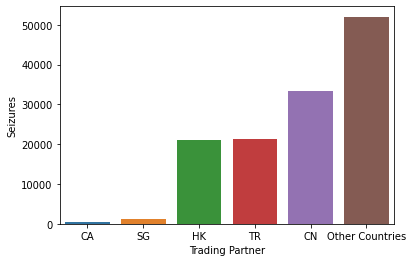

In [125]:
print("Total Seizures:", tp_df.Seizures.sum())
sns.barplot(
    data=tp_df, x="Trading Partner", y="Seizures", order=list(tp_df["Trading Partner"])
)

## High-Value Imports, Inc Product Risk

### Risk Per Trading Partner (over all products)

How many seizures were predicted per trading partner for the list of HVI's products?

In [153]:
import pandas as pd

products_df = pd.read_csv("data/processed/hvi_products_risk.csv")
print("Total Records", len(products_df))
products_df.head()

Total Records 4200


,product_id,brand_name,trading_partner,line_count,msrp,seized_pred
0,2296012,Roadster,cn,24,17.909200,1
1,13780156,LOCOMOTIVE,cn,24,13.727599,0
2,11895958,Roadster,cn,24,16.714456,1
3,4335679,Zivame,cn,24,15.471924,1
4,11690882,Roadster,cn,24,7.156511,1


In [167]:
products_tp_df = products_df.copy()
products_df["trading_partner"] = products_tp_df.trading_partner.apply(
    lambda x: (
        x.upper()
        if len(x) <= 2
        else " ".join([w[0].upper() + w[1:] for w in x.split(" ")])
    )
)
products_tp_df.rename(
    columns={
        "trading_partner": "Trading Partner",
        "seized_pred": "Seized",
    },
    inplace=True,
)
products_tp_df["Seized"] = products_tp_df.Seized.apply(
    lambda x: "Yes" if x == 1 else "No"
)
products_tp_df = (
    products_tp_df.groupby(  # [products_df.seized_pred == 1]
        ["Trading Partner", "Seized"]
    )
    .size()
    .unstack()
)
# products_tp_df["seized_pred"] = products_tp_df.seized_pred.apply(
#     lambda x: "Yes" if x == 1 else "No"
# )
products_tp_df.sort_values(ascending=False, by=["No", "Yes"], inplace=True)
print(products_tp_df.to_latex())

\begin{tabular}{lrr}
\toprule
Seized & No & Yes \\
Trading Partner &  &  \\
\midrule
CA & 434 & 266 \\
Other Countries & 238 & 462 \\
CN & 177 & 523 \\
HK & 153 & 547 \\
TR & 45 & 655 \\
SG & 26 & 674 \\
\bottomrule
\end{tabular}



Total Predictions: 4200


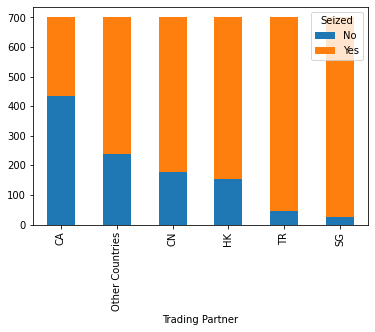

In [165]:
print("Total Predictions:", len(products_df))

products_tp_df.plot(kind="bar", stacked=True);
# sns.barplot(
#     data=products_tp_df,
#     x="Trading Partner",
#     y="Seizures",

#     order=list(products_tp_df['Trading Partner'])
# );

### Risk Per Product (over all trading partners)

#### Top 15 Riskiest Products

In [173]:
top15_risk_df = (
    products_df[products_df.seized_pred == 1]
    .groupby("product_id", as_index=False)
    .size()
    .sort_values(ascending=False, by="size")[:15]
)
top15_risk_df.rename(
    columns={"product_id": "Product ID", "size": "Seizures"}, inplace=True
)
top15_risk_df['Percent'] = top15_risk_df.Seizures.apply(lambda x: '{:0.2f}%'.format(x / 4200 * 100))
top15_risk_df

,Product ID,Seizures,Percent
99,17899308,40,0.95%
12,6791064,36,0.86%
96,17727536,36,0.86%
82,16718166,36,0.86%
48,13504004,36,0.86%
37,11895958,35,0.83%
43,12696136,35,0.83%
21,10307375,35,0.83%
15,8439415,35,0.83%
63,15004020,35,0.83%


In [178]:
print(top15_risk_df.to_latex(index=False))

\begin{tabular}{rrl}
\toprule
Product ID & Seizures & Percent \\
\midrule
17899308 & 40 & 0.95% \\
6791064 & 36 & 0.86% \\
17727536 & 36 & 0.86% \\
16718166 & 36 & 0.86% \\
13504004 & 36 & 0.86% \\
11895958 & 35 & 0.83% \\
12696136 & 35 & 0.83% \\
10307375 & 35 & 0.83% \\
8439415 & 35 & 0.83% \\
15004020 & 35 & 0.83% \\
15183010 & 35 & 0.83% \\
15531346 & 35 & 0.83% \\
16748200 & 35 & 0.83% \\
10561392 & 35 & 0.83% \\
15470056 & 34 & 0.81% \\
\bottomrule
\end{tabular}



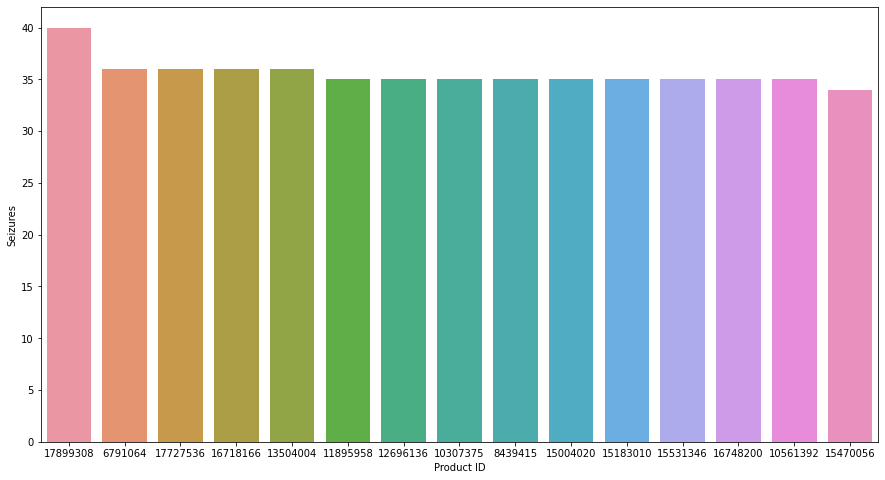

In [86]:
plt.figure(figsize=(15, 8))
sns.barplot(
    data=top15_risk_df, x="Product ID", y="Seizures", order=top15_risk_df["Product ID"]
)

#### Top 15 Safest Products

In [175]:
from format_util import to_percent

top15_safe_df = (
    products_df[products_df.seized_pred == 1]
    .groupby("product_id", as_index=False)
    .size()
    .sort_values(ascending=True, by="size")[:15]
)
top15_safe_df.rename(
    columns={"product_id": "Product ID", "size": "Seizures"}, inplace=True
)
top15_safe_df['Percent'] = top15_safe_df.Seizures.apply(lambda x: '{:0.2f}%'.format(to_percent(x, 4200)))
top15_safe_df

,Product ID,Seizures,Percent
62,14868494,17,0.40%
69,15599130,20,0.48%
98,17784638,21,0.50%
92,17530728,21,0.50%
35,11634538,21,0.50%
94,17612862,22,0.52%
53,14084226,23,0.55%
40,12153330,24,0.57%
61,14868168,24,0.57%
88,17383362,24,0.57%


In [177]:
print(top15_safe_df.to_latex(index=False))

\begin{tabular}{rrl}
\toprule
Product ID & Seizures & Percent \\
\midrule
14868494 & 17 & 0.40% \\
15599130 & 20 & 0.48% \\
17784638 & 21 & 0.50% \\
17530728 & 21 & 0.50% \\
11634538 & 21 & 0.50% \\
17612862 & 22 & 0.52% \\
14084226 & 23 & 0.55% \\
12153330 & 24 & 0.57% \\
14868168 & 24 & 0.57% \\
17383362 & 24 & 0.57% \\
10771696 & 25 & 0.60% \\
7846797 & 25 & 0.60% \\
13561988 & 27 & 0.64% \\
12872472 & 27 & 0.64% \\
16601348 & 27 & 0.64% \\
\bottomrule
\end{tabular}



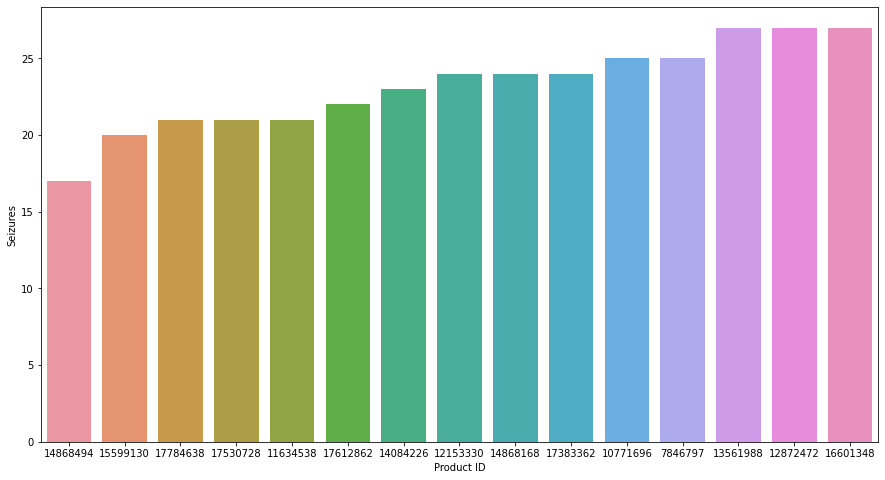

In [85]:
plt.figure(figsize=(15, 8))
sns.barplot(
    data=top15_safe_df, x="Product ID", y="Seizures", order=top15_safe_df["Product ID"]
)

### Risk Per Trading Partner and Product

In [197]:
risk_tp_products_df = (
    products_df[products_df.seized_pred == 1]
    .groupby(["product_id", "trading_partner"], as_index=False)
    .size()
    .sort_values(ascending=False, by="size")
)

risk_tp_products_df.rename(
    columns={
        "product_id": "Product ID",
        "trading_partner": "Trading Partner",
        "size": "Seizures",
    },
    inplace=True,
)
risk_tp_products_df

,Product ID,Trading Partner,Seizures
599,17899308,TR,7
137,10367061,TR,7
382,15004020,SG,7
380,15004020,HK,7
142,10441252,SG,7
...,...,...,...
294,13561988,CA,2
312,13842386,CA,2
318,14084226,CA,2
319,14084226,CN,2


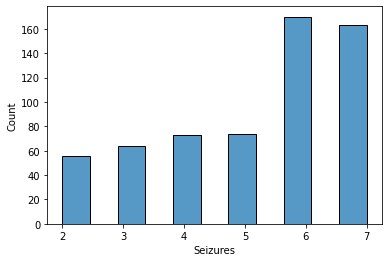

In [198]:
sns.histplot(data=risk_tp_products_df, x='Seizures');

Next we look at the trading partner distribution per highest and smallest buckets

#### Top 20 Riskiest Trading Partner and Product

First the smallest one, that is products with 2 seizures

In [208]:
top20_most_likely_to_be_siezed_df = risk_tp_products_df[risk_tp_products_df["Seizures"] == 6].groupby(
    "Trading Partner", as_index=False
).sum().sort_values(ascending=False, by="Seizures")[:20]

In [209]:
print(top20_most_likely_to_be_siezed_df.to_latex(index=False))

\begin{tabular}{lrr}
\toprule
Trading Partner & Product ID & Seizures \\
\midrule
CN & 721058602 & 366 \\
HK & 536527268 & 270 \\
Other Countries & 354274418 & 168 \\
SG & 260837641 & 120 \\
TR & 236417323 & 96 \\
\bottomrule
\end{tabular}



#### Top 20 Safest Trading Partner and Product

In [210]:
top20_less_likely_to_be_seized_df = risk_tp_products_df[risk_tp_products_df["Seizures"] == 2].groupby(
    "Trading Partner", as_index=False
).sum().sort_values(ascending=True, by="Seizures")
top20_less_likely_to_be_seized_df

,Trading Partner,Product ID,Seizures
2,HK,14868494,2
4,TR,15599130,2
3,Other Countries,48080486,6
1,CN,57337278,8
0,CA,600418076,94


In [212]:
print(top20_less_likely_to_be_seized_df.to_latex(index=False))

\begin{tabular}{lrr}
\toprule
Trading Partner & Product ID & Seizures \\
\midrule
HK & 14868494 & 2 \\
TR & 15599130 & 2 \\
Other Countries & 48080486 & 6 \\
CN & 57337278 & 8 \\
CA & 600418076 & 94 \\
\bottomrule
\end{tabular}



## Appendix

In [269]:
product_catalog_df = pd.read_csv("data/raw/hvi-products.csv")
product_catalog_df

,product_id,product,category,individual_category,brand_name,description,price_usd
0,2296012,Wearing Apparel/Accessories,Bottom Wear,jeans,Roadster,roadster men navy blue slim fit mid rise clean...,17.909200
1,13780156,Wearing Apparel/Accessories,Bottom Wear,track-pants,LOCOMOTIVE,locomotive men black white solid slim fit tra...,13.727599
2,11895958,Wearing Apparel/Accessories,Topwear,shirts,Roadster,roadster men navy white black geometric print...,16.714456
3,4335679,Wearing Apparel/Accessories,Lingerie & Sleep Wear,shapewear,Zivame,zivame women black saree shapewear zi3023core0...,15.471924
4,11690882,Wearing Apparel/Accessories,Western,tshirts,Roadster,roadster women white solid v neck pure cotton ...,7.156511
...,...,...,...,...,...,...,...
95,16204964,Wearing Apparel/Accessories,Sports Wear,shorts,GRACIT,gracit women pack of 2 pink skinny fit biker s...,14.313023
96,17592044,Wearing Apparel/Accessories,Western,tops,U&F,uf women tranquil teal geometric volume play top,23.882915
97,17014922,Wearing Apparel/Accessories,Western,sweaters,FOREVER 21,forever 21 women white striped cardigan,23.882915
98,17370302,Wearing Apparel/Accessories,Western,jumpsuit,Cottinfab,cottinfab grey white striped capri jumpsuit,26.272401


In [270]:
appendix_df = product_catalog_df[["product_id", "category", "individual_category", "brand_name", "description", "price_usd"]].copy()

In [271]:
appendix_df.rename(columns={
    'product_id': 'Product ID',
    'brand_name': 'Brand',
    'description': 'Description',
    'price_usd': 'Price (USD)'
}, inplace=True)
appendix_df['Category'] = appendix_df.apply(lambda r: f'{r["category"]} ({r["individual_category"]})', axis='columns')
appendix_df['Price (USD)'] = appendix_df['Price (USD)'].apply(lambda x: '{:0.2f}'.format(x))
appendix_df.head()

,Product ID,category,individual_category,Brand,Description,Price (USD),Category
0,2296012,Bottom Wear,jeans,Roadster,roadster men navy blue slim fit mid rise clean...,17.91,Bottom Wear (jeans)
1,13780156,Bottom Wear,track-pants,LOCOMOTIVE,locomotive men black white solid slim fit tra...,13.73,Bottom Wear (track-pants)
2,11895958,Topwear,shirts,Roadster,roadster men navy white black geometric print...,16.71,Topwear (shirts)
3,4335679,Lingerie & Sleep Wear,shapewear,Zivame,zivame women black saree shapewear zi3023core0...,15.47,Lingerie & Sleep Wear (shapewear)
4,11690882,Western,tshirts,Roadster,roadster women white solid v neck pure cotton ...,7.16,Western (tshirts)


In [274]:
appendix_df.drop(columns=["category", "individual_category"], inplace=True)
appendix_df = appendix_df[["Product ID", "Category", "Brand", "Price (USD)"]]

appendix_df['Brand'] = appendix_df.Brand.apply(lambda x: x.replace("_", "\_").replace("&", "and"))
appendix_df['Category'] = appendix_df.Category.apply(lambda x: x.replace("_", "\_").replace("&", "and"))
# appendix_df['Description'] = appendix_df.Description.apply(lambda x: x.replace("_", "\_").replace("&", "and"))

<ipython-input-274-d9c6491f381a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appendix_df['Brand'] = appendix_df.Brand.apply(lambda x: x.replace("_", "\_").replace("&", "and"))
<ipython-input-274-d9c6491f381a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appendix_df['Category'] = appendix_df.Category.apply(lambda x: x.replace("_", "\_").replace("&", "and"))


In [276]:
print(appendix_df.to_latex(index=False))

\begin{tabular}{rlll}
\toprule
Product ID & Category & Brand & Price (USD) \\
\midrule
2296012 & Bottom Wear (jeans) & Roadster & 17.91 \\
13780156 & Bottom Wear (track-pants) & LOCOMOTIVE & 13.73 \\
11895958 & Topwear (shirts) & Roadster & 16.71 \\
4335679 & Lingerie and Sleep Wear (shapewear) & Zivame & 15.47 \\
11690882 & Western (tshirts) & Roadster & 7.16 \\
2490950 & Western (tops) & Mast and Harbour & 7.16 \\
6744434 & Bottom Wear (trousers) & HIGHLANDER & 17.91 \\
8439415 & Western (tops) & Mayra & 16.67 \\
17381394 & Western (tshirts) & Roadster & 13.12 \\
2359257 & Bottom Wear (jeans) & HEREandNOW & 32.84 \\
7695793 & Sports Wear (tights) & HRX by Hrithik Roshan & 32.25 \\
10307375 & Topwear (tshirts) & Roadster & 8.35 \\
12873874 & Indian Wear (kurta-sets) & Anubhutee & 40.61 \\
11634538 & Western (jumpsuit) & Athena & 29.86 \\
2312181 & Western (tshirts) & Roadster & 9.55 \\
13842386 & Topwear (shirts) & HIGHLANDER & 13.13 \\
10473520 & Indian Wear (kurtas) & Vishudh & 20.3